# Определение возраста покупателей

## Исследовательский анализ данных

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
data = pd.read_csv('/datasets/faces/labels.csv')
train_data = datagen.flow_from_dataframe(dataframe=data, directory='/datasets/faces/final_files/', x_col='file_name', 
                                         y_col='real_age', target_size=(224, 224), batch_size=32, class_mode='raw', seed=12345)

Found 7591 validated image filenames.


In [4]:
data.shape

(7591, 2)

In [5]:
data.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [6]:
data.info

<bound method DataFrame.info of        file_name  real_age
0     000000.jpg         4
1     000001.jpg        18
2     000002.jpg        80
3     000003.jpg        50
4     000004.jpg        17
...          ...       ...
7586  007608.jpg        14
7587  007609.jpg        37
7588  007610.jpg        28
7589  007611.jpg        20
7590  007612.jpg        47

[7591 rows x 2 columns]>

Text(0, 0.5, 'Количество')

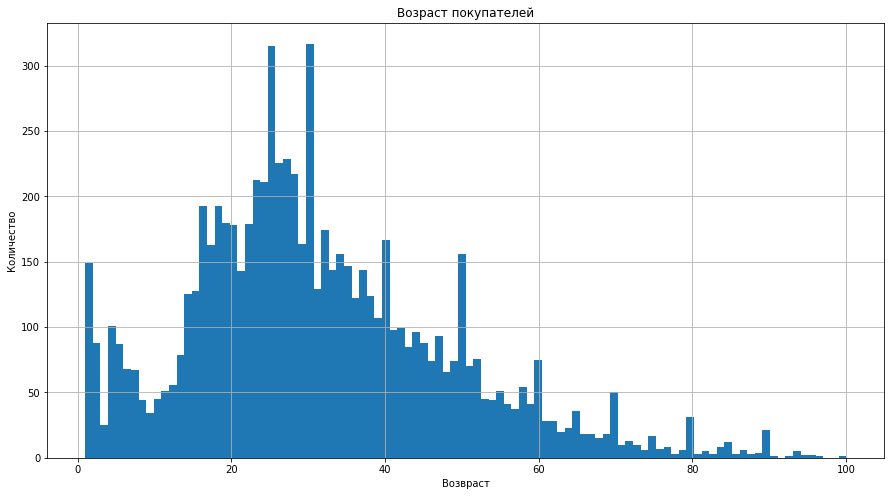

In [7]:
data.hist(figsize=(15, 8), bins=100)
plt.title('Возраст покупателей')
plt.xlabel('Возвраст')
plt.ylabel('Количество')

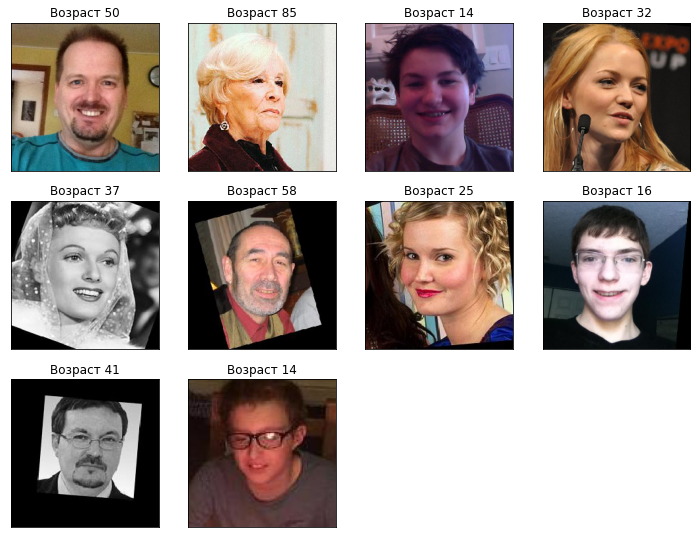

In [8]:
features, target = next(train_data)

fig = plt.figure(figsize=(10,10))
for i in range(10):
    img_index= i*3
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[img_index])
    plt.title('Возраст '+ str(target[img_index]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

В наборе данных содержится 7591 фотография, включая изображения, на которых лица частично закрыты. Большая часть людей на фотографиях принадлежит возрастной группе от 20 до 40 лет.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
from tensorflow.keras.layers import Conv2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
 
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv') 
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25, horizontal_flip=True) 
    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=labels, directory=path + 'final_files/', 
                                                           x_col='file_name', y_col='real_age', target_size=(224, 224), 
                                                           batch_size=16, class_mode='raw', subset='training', 
                                                           seed=12345)
    return train_datagen_flow
 
 
 
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv') 
    test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25) 
    test_datagen_flow = test_datagen.flow_from_dataframe(dataframe=labels, directory=path + 'final_files/', 
                                                         x_col='file_name', y_col='real_age', target_size=(224, 224), 
                                                         batch_size=16, class_mode='raw',  subset='validation', 
                                                         seed=12345)
    return test_datagen_flow
 
 
def create_model(input_shape):
    optimizer = Adam(learning_rate=0.0001)
    backbone = ResNet50(input_shape=(150, 150, 3), 
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        include_top=False) 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae']) 
    return model
 
 
def train_model(model, train_data, test_data, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):
    model.fit(train_data, validation_data=test_data, batch_size=batch_size, epochs=epochs, 
              steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, verbose=2, shuffle=True) 
    return model

```

```
Train for 356 steps, validate for 119 steps
Epoch 1/10
356/356 - 48s - loss: 199.9788 - mae: 10.2979 - val_loss: 776.8718 - val_mae: 22.8853
Epoch 2/10
356/356 - 38s - loss: 83.3806 - mae: 6.9479 - val_loss: 162.3048 - val_mae: 9.6268
Epoch 3/10
356/356 - 38s - loss: 56.5343 - mae: 5.7769 - val_loss: 83.0908 - val_mae: 6.8449
Epoch 4/10
356/356 - 38s - loss: 43.9867 - mae: 5.0587 - val_loss: 128.4116 - val_mae: 8.3210
Epoch 5/10
356/356 - 38s - loss: 35.2958 - mae: 4.5622 - val_loss: 80.2950 - val_mae: 6.8908
Epoch 6/10
356/356 - 38s - loss: 26.4823 - mae: 3.9482 - val_loss: 67.5732 - val_mae: 6.2603
Epoch 7/10
356/356 - 38s - loss: 19.2680 - mae: 3.3759 - val_loss: 66.1188 - val_mae: 6.1145
Epoch 8/10
356/356 - 41s - loss: 16.2804 - mae: 3.0644 - val_loss: 62.9479 - val_mae: 5.9238
Epoch 9/10
356/356 - 40s - loss: 13.9019 - mae: 2.8487 - val_loss: 71.5533 - val_mae: 6.4596
Epoch 10/10
356/356 - 41s - loss: 14.1061 - mae: 2.8448 - val_loss: 75.2077 - val_mae: 6.4499
119/119 - 10s - loss: 75.2077 - mae: 6.4499
Test MAE: 6.4499
```

## Анализ обученной модели

С использованием сверточной нейронной сети на основе архитектуры ResNet50 и активатора relu была создана модель, способная достоверно предсказывать возраст покупателей. Показатель метрики MAE для данной модели составляет 6.4499, что считается отличным результатом.

Для улучшения модели рекомендуется увеличить объем обучающих данных путем добавления дополнительных фотографий людей. Также следует отобрать изображения, где лица представлены только в анфас и не перекрыты другими объектами. Эти меры помогут дальше улучшить точность и надежность модели.